In [22]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import random

## Let's Inspect the Data

In [2]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("Pokemon-5Class-dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Pokemon-5Class-dataset'.
There are 5 directories and 0 images in 'Pokemon-5Class-dataset/dataset'.
There are 0 directories and 234 images in 'Pokemon-5Class-dataset/dataset/pikachu'.
There are 0 directories and 238 images in 'Pokemon-5Class-dataset/dataset/charmander'.
There are 0 directories and 239 images in 'Pokemon-5Class-dataset/dataset/mewtwo'.
There are 0 directories and 223 images in 'Pokemon-5Class-dataset/dataset/squirtle'.
There are 0 directories and 233 images in 'Pokemon-5Class-dataset/dataset/bulbasaur'.
There are 0 directories and 6 images in 'Pokemon-5Class-dataset/Test_images'.


## Visualize the Date

In [3]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (1200, 1920, 3)


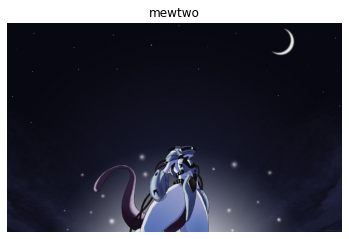

In [4]:

img = view_random_image(target_dir="Pokemon-5Class-dataset/dataset/", target_class="mewtwo")

## An end-to-end example

* Load out images
* Preprocess our images
* Build a CNN to find patterns in our iamges
* Compile our CNN
* Fit the CNN to our training data

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# set the random seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 and 1, also called scaling/ normalization)
train_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories 
train_dir = "Pokemon-5Class-dataset/dataset"

# import data form directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               batch_size = 32,
                                               target_size =(400,400),
                                               class_mode = "categorical",
                                               seed = 42)

Found 1166 images belonging to 5 classes.


In [7]:
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

/home/specter/miniconda3/envs/ml/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(32, 32)

In [8]:
images.shape

(32, 400, 400, 3)

In [9]:
images[0]

array([[[0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589],
        ...,
        [0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589]],

       [[0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589],
        ...,
        [0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589]],

       [[0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589],
        ...,
        [0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589]],

       ...,

       [[0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589],
        [0.5921569, 0.7960785, 0.8470589],
        ...,
        [0.5921569, 0.7960

In [10]:
labels[:10]

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras import Sequential

In [12]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model = Sequential([
  Conv2D(filters=10,
         kernel_size =3,
         padding = 'valid',
         strides=1,
         activation= 'relu',
         input_shape=(400, 400, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(5, activation='softmax')
])

In [13]:
model.compile(loss = "categorical_crossentropy",
            optimizer = Adam(),
            metrics = ['accuracy'])

In [14]:
history = model.fit(train_data, 
          epochs = 5,
          steps_per_epoch=len(train_data)
          )

Epoch 1/5
37/37 [==============================] - 43s 1s/step - loss: 1.2939 - accuracy: 0.4580
Epoch 2/5
37/37 [==============================] - 44s 1s/step - loss: 0.6464 - accuracy: 0.7727
Epoch 3/5
37/37 [==============================] - 44s 1s/step - loss: 0.4246 - accuracy: 0.8525
Epoch 4/5
37/37 [==============================] - 44s 1s/step - loss: 0.2770 - accuracy: 0.9091
Epoch 5/5
37/37 [==============================] - 44s 1s/step - loss: 0.1901 - accuracy: 0.9374


## Plot loss curves for the model 

In [15]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  accuracy = history.history['accuracy']
  
  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

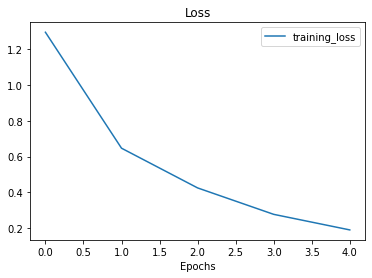

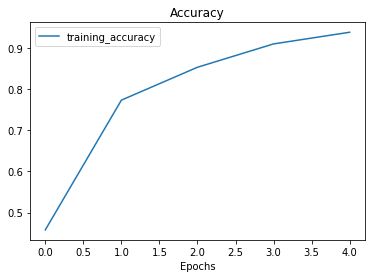

In [16]:
plot_loss_curves(history)

## Preparing the images to test the model

In [17]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img,channels=3)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img


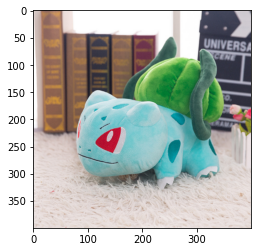

In [18]:
img = load_and_prep_image(filename="Pokemon-5Class-dataset/Test_images/bulbasaur_plush.png",img_shape=400)
plt.imshow(img)

## Get Class Names

In [19]:
class_names = os.listdir("Pokemon-5Class-dataset/dataset")
class_names.sort()

In [20]:
class_names

['bulbasaur', 'charmander', 'mewtwo', 'pikachu', 'squirtle']

## Predicting on the Test Imags

In [23]:
pred_probs = model.predict(tf.expand_dims(img, axis = 0))
print(pred_probs)
print(class_names[np.argmax(pred_probs)])

[[7.4833292e-01 4.1058692e-04 3.7332918e-02 4.1605995e-04 2.1350743e-01]]
bulbasaur


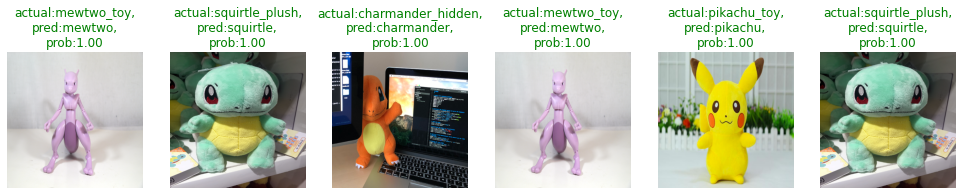

In [29]:
# Make prediction on series of random images
import os 
import random
plt.figure(figsize= (17,10))

for i in range(6):
  # choose random images from random classes
  image_file = random.choice(os.listdir("Pokemon-5Class-dataset/Test_images"))
  file_path = "Pokemon-5Class-dataset/Test_images"+ "/" + image_file
  class_name = image_file.split(".")[0]
  # Load the image and make predictions
  img = load_and_prep_image(file_path,img_shape = 400,scale = False)
  pred_prob = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[pred_prob.argmax()]
  
  # Plot the images
  plt.subplot(1,6,i+1)
  plt.imshow(img/255.)
  if pred_class in class_name:
    color = "g"
  else:
    color = "r"
  plt.title(f"actual:{class_name},\npred:{pred_class},\nprob:{pred_prob.max():.2f}",c = color)
  plt.axis(False)